<a href="https://colab.research.google.com/github/jai1624/webscrapping/blob/master/Sentiment_Analysis_with_hotel_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Raw Data

Load the raw data.Based on the textual review split the postive and negative review.


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/Sentiment-Analysis"

Final_T20Project-Copy1.ipynb  Sentiment_Analysis_with_hotel_review.ipynb
London_hotel_reviews.csv      T20Project-Part1.ipynb


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style
np.random.seed(7) # seeding random number generator
%matplotlib inline
#read data
reviews_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Sentiment-Analysis/London_hotel_reviews.csv",encoding = "utf-8")
reviews_df.head(5)
reviews_df

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Property_Name,Review_Rating,Review_Title,Review_Text,Location,Date_Review
0,Apex London Wall Hotel,5.0,Ottima qualità prezzo,Siamo stati a Londra per un week end ed abbiam...,"Casale Monferrato, Italy",10/20/2012
1,Corinthia Hotel London,5.0,"By far, my best hotel in the world",I had a pleasure of staying in this hotel for ...,"Savannah, Georgia",3/23/2016
2,The Savoy,5.0,First visit to the American Bar at the Savoy,A very lovely first visit to this iconic hotel...,London,7/30/2013
3,Rhodes Hotel,4.0,Nice stay,3 of us stayed at the Rhodes Hotel for 4 night...,"Maui, Hawaii",06/02/2012
4,The Savoy,5.0,Perfection,Form the moment we arrived until we left we ex...,"London, United Kingdom",11/24/2017
...,...,...,...,...,...,...
27326,Corinthia Hotel London,5.0,The Best 5 star Luxury Hotel in London,I come to London often but since I stayed in t...,"Munich, Germany",12/12/2015
27327,A To Z Hotel,3.0,Mala Estadia,En cuarto que nos tocó no había toallas y habí...,"Mexico City, Mexico",9/29/2015
27328,The Rembrandt,4.0,Excellent hotel in outstanding location,This is a quality quiet hotel located in an ex...,"Adelaide, Australia",07/11/2017
27329,The Dorchester,4.0,"Trevliga rum, men högljud AC","Väldigt vackra rum, tyvärr med en mycket höglj...","Gothenburg, Sweden",05/06/2014


# Descriptive Statistics

*  Average Review Rating of 4.49 with low standard deviation.
*  Most reviews are positive from second quartile onwards

In [0]:
data = reviews_df.copy()
data.describe()

,Review_Rating
count,27329.000000
mean,4.490980
std,0.891715
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


# Data Information












In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27331 entries, 0 to 27330
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_Name  27329 non-null  object 
 1   Review_Rating  27329 non-null  float64
 2   Review_Title   27329 non-null  object 
 3   Review_Text    27329 non-null  object 
 4   Location       23376 non-null  object 
 5   Date_Review    27328 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.3+ MB




* Review_Text category has only two missing data (27329/27331) -> Good news!
* Drop Review_Title and Date_Review
* Location droped due to missing value









In [0]:
# Unique Property Name
data["Property_Name"].unique()

array(['Apex London Wall Hotel', 'Corinthia Hotel London', 'The Savoy',
       'Rhodes Hotel', 'Mondrian London at Sea Containers',
       'Mandarin Oriental Hyde Park, London', 'The Dorchester',
       'A To Z Hotel', 'Ridgemount Hotel',
       'The Wellesley Knightsbridge, a Luxury Collection Hotel, London',
       'The Rembrandt', 'London Guest House',
       'Hotel Xenia, Autograph Collection', 'Bulgari Hotel, London',
       'The Lanesborough', '45 Park Lane - Dorchester Collection',
       'Marble Arch Hotel', 'Newham Hotel', 'Hartley Hotel',
       'City View Hotel', nan], dtype=object)

# To find unique property name

In [0]:
property_unique = len(data["Property_Name"].unique())
print("Number of Unique property name: " + str(property_unique))

Number of Unique property name: 21


**Visualizing the distributions of numerical variables:**

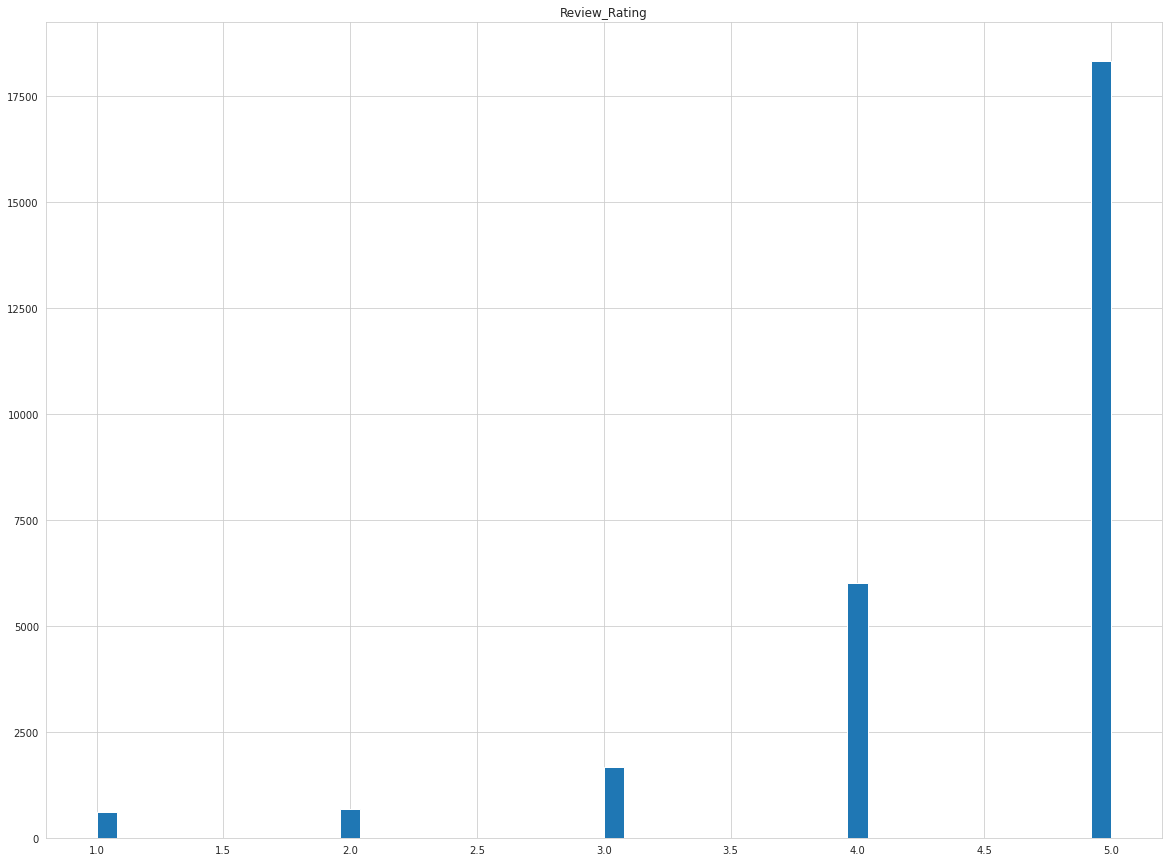

In [0]:
data.hist(bins=50, figsize=(20,15)) # builds histogram and set the number of bins and fig size (width, height)
plt.show()

Based on the above distribution 

> Review Rating

*   Majority of hotels are rated highly (looking at rating distribution)
*   There is twice the amount of 5 start ratings than the other ratings combined




# Split into Train/Test

*   Split the data into training set and test sets
*   Our aim is to train a sentiment analysis classifier 
*   Since the majority of reviews are positive (5 stars), we will need to do a stratified split on the reviews score to ensure that we don't train the classifier on imbalanced data
*   To use sklearn's Stratified ShuffleSplit class, we're going to remove all samples that have NAN in review score, then covert all review scores to integer datatype





In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(data)))
dataAfter = data.dropna(subset=["Review_Rating"]) # removes all NAN in Review_Rating
print("After {}".format(len(dataAfter)))
dataAfter["Review_Rating"] = dataAfter["Review_Rating"].astype(int)

Before 27331
After 27329


In [0]:

split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter, dataAfter["Review_Rating"]): 
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)



```
# This is formatted as code
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter, dataAfter["Review_Rating"]): 
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)
```


```
# Output
strat_train = 21863
strat_tes = 5466

```





**Check to see if train/test sets were stratified proportionately in comparision to raw data.**

In [0]:
len(strat_train)

21863

In [0]:
strat_train["Review_Rating"].value_counts()/len(strat_train) # value_count() counts all the values based on column
print(strat_train)

                           Property_Name  ...  Date_Review
15561  Mondrian London at Sea Containers  ...    9/18/2015
2842                           The Savoy  ...    7/19/2017
11419                       Rhodes Hotel  ...   04/08/2015
22675  Mondrian London at Sea Containers  ...    5/22/2016
12466                       Rhodes Hotel  ...    7/29/2014
...                                  ...  ...          ...
19966                          The Savoy  ...    7/21/2016
19964                          The Savoy  ...   05/08/2018
27272                          The Savoy  ...    6/22/2018
17186                          The Savoy  ...   05/06/2017
24561                      The Rembrandt  ...    1/16/2018

[21863 rows x 6 columns]


In [0]:
len(strat_test)

5466

In [0]:
strat_test["Review_Rating"].value_counts()/len(strat_test)

5.0    0.683315
4.0    0.218441
3.0    0.053421
1.0    0.022320
2.0    0.022320
Name: Review_Rating, dtype: float64

# Data Exploration (Training Set)

In [0]:
reviews = strat_train.copy()
reviews.head(5)

,Property_Name,Review_Rating,Review_Title,Review_Text,Location,Date_Review
15561,Mondrian London at Sea Containers,5.0,Great hotel in a superb location.,The Mondrian sits on the South Bank just acros...,"Colchester, United Kingdom",9/18/2015
2842,The Savoy,5.0,One of the best !,Our room was very nice and the bathroom lovely...,"Needham, Massachusetts",7/19/2017
11419,Rhodes Hotel,5.0,Home away from Home,I stay at Rhodes Hotel every time I return to ...,"Gold Coast, Australia",04/08/2015
22675,Mondrian London at Sea Containers,5.0,"Lovely, relaxing hotel",I was treated to a 2 night stay here for my bi...,"King's Lynn, United Kingdom",5/22/2016
12466,Rhodes Hotel,3.0,Not bad for London,It's hard to find a good hotel in London becau...,NaN,7/29/2014


Will explore the following columns:


*   Property_Name
*   Review_Rating
*   Review_Text - not possible since text is an long words

---
Explore Property_Name





In [0]:
# Entire training dataset average rating
reviews["Review_Rating"].mean()

4.484127710182051

**Property Name**


In [0]:
len(reviews["Property_Name"].unique())

21

In [0]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21863 entries, 15561 to 24561
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_Name  21862 non-null  object 
 1   Review_Rating  21862 non-null  float64
 2   Review_Title   21862 non-null  object 
 3   Review_Text    21862 non-null  object 
 4   Location       18672 non-null  object 
 5   Date_Review    21861 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.8+ MB


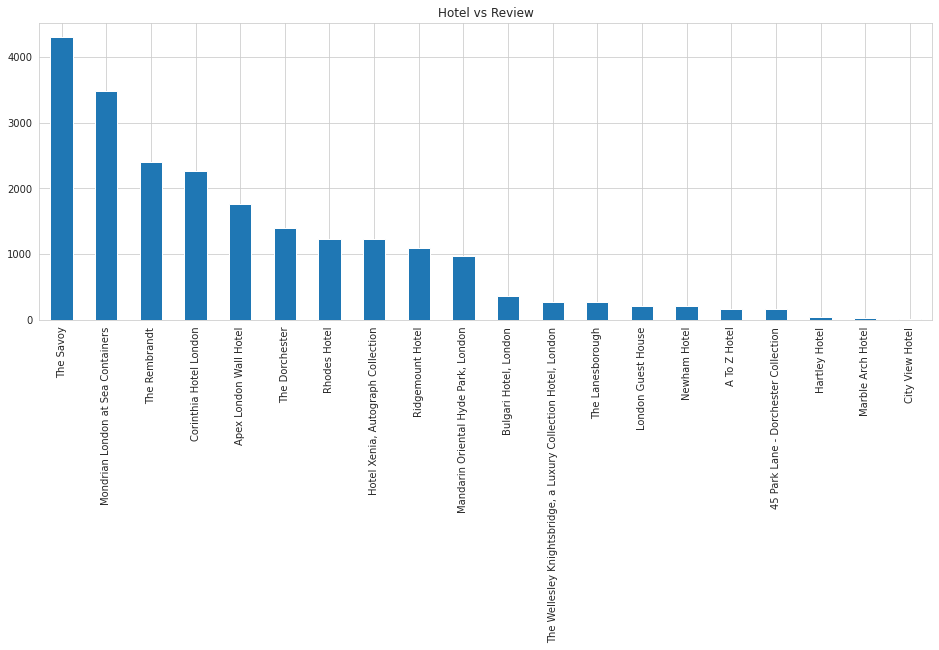

In [0]:
property_count_ix = reviews["Property_Name"].value_counts().index
plt.subplots(figsize=(16,12))
plt.subplot(2,1,1)
reviews["Property_Name"].value_counts().plot(kind="bar",title= "Hotel vs Review")


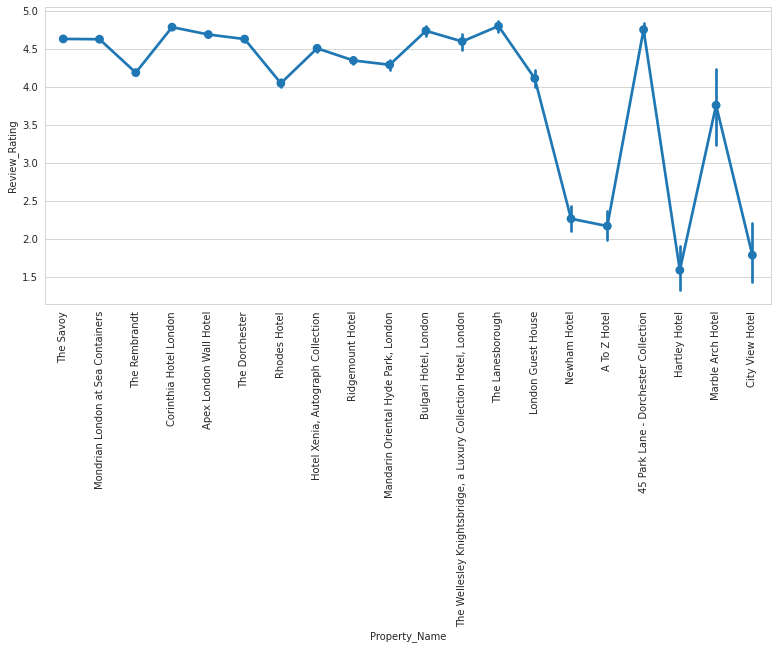

In [0]:
plt.subplots(figsize=(13,12))
plt.subplot(2,1,2)
sns.pointplot(x="Property_Name", y="Review_Rating", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

* The most frequently reviewed hotel have their average Review_Rating in the 4.5 - 4.8 range, with little variance
* Although there is a slight inverse relationship between the hotel and average review ratings for the first 4 , this relationship is not significant since the average review for the first 4 hotels are rated between 4.5 - 4.8, which is considered good overall reviews.
*For hotels with lower frequencies as shown on the bar graph (top), we see that their corresponding average review ratings on the point-plot graph (bottom) has significantly higher variance as shown by the length of the vertical lines. As a result, we suggest that, the average review ratings for hotle with lower frequencies are not significant for our analysis due to high variance
* On the other hand, due to their lower frequencies for hotle, suggest that this is a result of less customer satisfaction
    
* Furthermore, the last 4 hotles have no variance due to their significantly lower frequencies, and although the review ratings are a perfect 5.0, but we should not consider the significance of these review ratings due to lower frequency as explained in 


**that point-plot graph automatically takes the average of the Review_Rating data.**


# **Correlations**

In [0]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21863 entries, 15561 to 24561
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_Name  21862 non-null  object 
 1   Review_Rating  21862 non-null  float64
 2   Review_Title   21862 non-null  object 
 3   Review_Text    21862 non-null  object 
 4   Location       18672 non-null  object 
 5   Date_Review    21861 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.2+ MB


In [0]:
counts = reviews["Property_Name"].value_counts().to_frame()
counts.head()

,Property_Name
The Savoy,4305
Mondrian London at Sea Containers,3484
The Rembrandt,2409
Corinthia Hotel London,2261
Apex London Wall Hotel,1760


In [0]:
avg_rating = reviews.groupby("Property_Name")["Review_Rating"].mean().to_frame()
avg_rating.head()

,Review_Rating
Property_Name,
45 Park Lane - Dorchester Collection,4.753165
A To Z Hotel,2.168750
Apex London Wall Hotel,4.689773
"Bulgari Hotel, London",4.738292
City View Hotel,1.785714


In [0]:
table = counts.join(avg_rating)
table

,Property_Name,Review_Rating
The Savoy,4305,4.631359
Mondrian London at Sea Containers,3484,4.627440
The Rembrandt,2409,4.188045
Corinthia Hotel London,2261,4.786378
Apex London Wall Hotel,1760,4.689773
The Dorchester,1396,4.629656
Rhodes Hotel,1236,4.048544
"Hotel Xenia, Autograph Collection",1223,4.507768
Ridgemount Hotel,1086,4.348066
"Mandarin Oriental Hyde Park, London",972,4.291152


,Property_Name,Review_Rating
Property_Name,1.000000,0.453775
Review_Rating,0.453775,1.000000


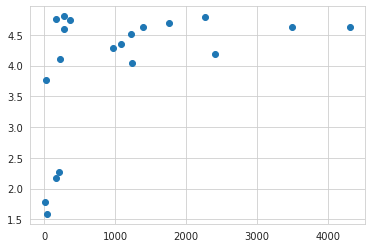

In [0]:
plt.scatter("Property_Name", "Review_Rating", data=table)
table.corr()

Correlation analysis between Hotel and reviews, can see that there is almost no correlation which is consistent with our findings